## Bagging
Bagging stands for **Bootstrap Aggregating**
Ensemble learning technique that use same algorithm in base model but different data for training
Bagging involves two steps:
1. Bootstrap
2. Aggregation
### Bootstrap
Means selection random sample from dataset
Can be choosen with or without replacement
Sample Selection from data can be row wise or Column Wise
Column Wise Selection called **Random subspace.**


## Main Aim of Bagging
Reduce Variance for Obtaining a model having Low bias and Low Variance
This can be achieve by using base model having low bias and randomly choosen dataset 
for keeping low variance

## Hyper Prameters of bagging


#### base_estimator
The type of model to bag
#### n_estimators
Number of base models to train
More estimators → better stability but slower
#### max_samples
Number (or fraction) of samples to draw for each base model
Default: 1.0 → same size as original dataset
Typical for bagging 25 to 50% percent from data give better results
####  max_features
Number (or fraction) of features to draw for each base model
Default: 1.0 → use all features
#### bootstrap
Whether to sample with replacement
Default: True (classical bagging)
#### bootstrap_features
Whether to sample features with replacement
Default: False
#### oob_score
Whether to calculate the Out-of-Bag score
True → uses samples not in bootstrap for validation
oob stand for **out of bag samples** 
Basically bagging classifier train on 63% sample
Remaining 36% samples are not seen by bagging classifier during training
So. these out of bag samples can be used for testing or checking the performance of model.
#### n_jobs
Number of parallel jobs to run
-1 → use all CPU cores
#### random_state
Random seed for reproducibility
Fix this to get same results every run

#### verbose
verbose just controls how much information your program prints out while it’s running.

verbose = 0 → No extra messages. Silent mode.

verbose = 1 → Show some progress messages. Like “Training model 1 of 10…”

verbose = 2 → Show even more details. (Some libraries have multiple levels.)

**verbose = “Do you want to see what’s happening behind the scenes?”**

## What is Out-of-Bag (OOB)?
When using bootstrap sampling, some samples are left out in each bootstrap dataset.

These “out-of-bag” samples can be used like a built-in validation set.

oob_score=True makes scikit-learn estimate accuracy using these.

## Bagging vs. Pasting
**Bagging** → Bootstrap Aggregating

It uses sampling with replacement → so the same data point can appear more than once in each sample.

This is called bootstrapping.

**Pasting** →

It does the same thing (makes multiple models on different random samples) but without replacement.

So each data point can appear only once in a sample — just like regular train/test splitting.

| Method  | Replacement?        | Nickname    |
| ------- | ------------------- | ----------- |
| Bagging | With replacement    | Bootstrap   |
| Pasting | Without replacement | Subsampling |



##  What are “patches”?
Patches = taking a random subset of both samples and features at the same time to train each base estimator.
##  How is it different?
| Concept              | What’s randomized?                                |
| -------------------- | ------------------------------------------------- |
| **Bagging**          | Random **samples**, all features                  |
| **Pasting**          | Random **samples**, all features (no replacement) |
| **Random Subspaces** | All samples, random **features** only             |
| **Patches**          | Random **samples** + random **features**          |

So patches = “random patches of samples and features”.
### Why use patches?
It adds more randomness → base models (like trees) see different rows and columns.

Helps create very diverse models, especially useful for high-dimensional data (lots of features).
### How to set?
When use BaggingClassifier or BaggingRegressor:

**max_samples** → controls the sample patch size (how many rows).

**max_features** → controls the feature patch size (how many columns).

**bootstrap** → whether samples are taken with replacement.

**bootstrap_features** → whether features are sampled with replacement.

So, if  set both max_samples < 1 and max_features < 1, means we are using patches.




In [1]:
## Bagging CLASSIFIER
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:

# Make a toy dataset
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

In [5]:
bagging.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.8, n_estimators=50, n_jobs=-1, random_state=42)

In [6]:
print(f"Single Tree accuracy: {tree.score(X_test, y_test):.2f}")
print(f"Bagging accuracy: {bagging.score(X_test, y_test):.2f}")

Single Tree accuracy: 0.90
Bagging accuracy: 0.89


In [7]:
## Hyper parameter tuning by Using GridSearchCv
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.6, 0.8, 1.0],
    'base_estimator__max_depth': [2, 3, 4, 5]  # Notice the double underscore!
}


In [8]:
grid_search = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

In [9]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                         max_samples=0.8, n_estimators=50,
                                         n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 3, 4, 5],
                         'max_features': [0.6, 0.8, 1.0],
                         'max_samples': [0.6, 0.8, 1.0],
                         'n_estimators': [10, 30, 50]},
             scoring='accuracy')

In [10]:
print("Best hyperparameters:")
print(grid_search.best_params_)

print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best hyperparameters:
{'base_estimator__max_depth': 5, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 50}
Best cross-validation accuracy: 0.89


In [11]:
best_model = grid_search.best_estimator_
test_acc = best_model.score(X_test, y_test)
print(f"Test set accuracy with best params: {test_acc:.2f}")

Test set accuracy with best params: 0.90


In [12]:
bagging.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.8, n_estimators=50, n_jobs=-1, random_state=42)

In [13]:
print(f"Single Tree accuracy: {tree.score(X_test, y_test):.2f}")
print(f"Bagging accuracy: {bagging.score(X_test, y_test):.2f}")

Single Tree accuracy: 0.90
Bagging accuracy: 0.89


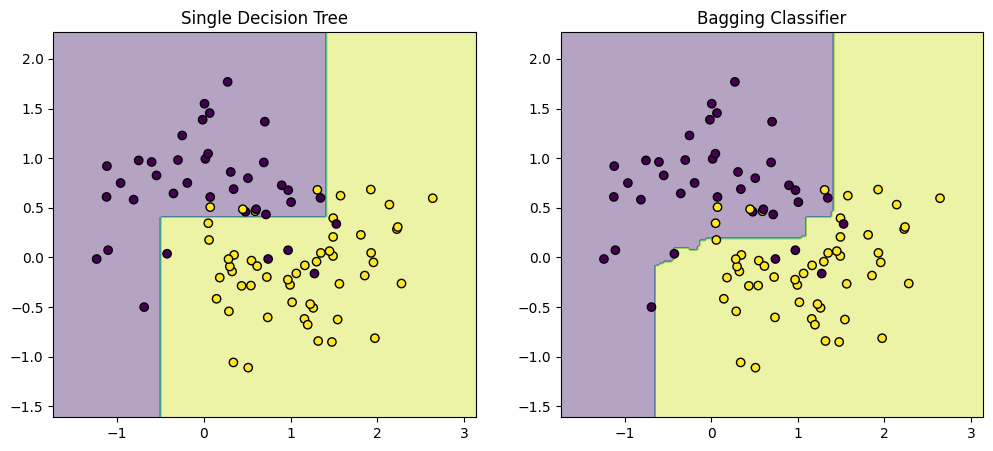

In [14]:
#  Plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(tree, X_test, y_test, axes[0], "Single Decision Tree")
plot_decision_boundary(bagging, X_test, y_test, axes[1], "Bagging Classifier")

plt.show()

In [15]:
# Bagging WITHOUT Patches (standard Bagging)
bagging_basic = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    max_samples=1.0,    # Use all samples
    max_features=1.0,   # Use all features
    bootstrap=True,
    oob_score=True,     # Enable OOB score!
    random_state=42,
    n_jobs=-1
)

In [16]:
bagging_basic.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)

In [17]:
#  Bagging WITH Patches (samples + features)
bagging_patches = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    max_samples=0.7,     # 70% of samples
    max_features=0.7,    # 70% of features
    bootstrap=True,
    bootstrap_features=True,   # Bootstrap features too
    oob_score=True,
    random_state=42,
    n_jobs=-1
)


In [18]:
bagging_patches.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  bootstrap_features=True, max_features=0.7, max_samples=0.7,
                  n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)

In [19]:
print(f"Single Tree accuracy: {tree.score(X_test, y_test):.2f}")
print(f"Bagging (no patches) accuracy: {bagging_basic.score(X_test, y_test):.2f}")
print(f"Bagging (no patches) OOB score: {bagging_basic.oob_score_:.2f}")
print(f"Bagging (patches) accuracy: {bagging_patches.score(X_test, y_test):.2f}")
print(f"Bagging (patches) OOB score: {bagging_patches.oob_score_:.2f}")

Single Tree accuracy: 0.90
Bagging (no patches) accuracy: 0.89
Bagging (no patches) OOB score: 0.85
Bagging (patches) accuracy: 0.92
Bagging (patches) OOB score: 0.87


In [20]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

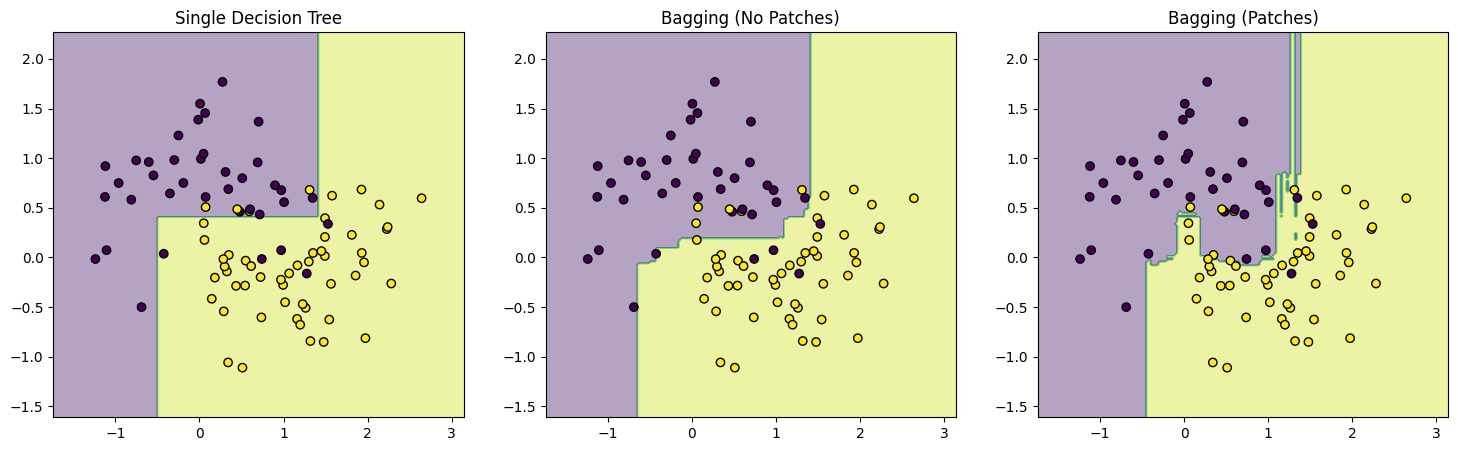

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(tree, X_test, y_test, axes[0], "Single Decision Tree")
plot_decision_boundary(bagging_basic, X_test, y_test, axes[1], "Bagging (No Patches)")
plot_decision_boundary(bagging_patches, X_test, y_test, axes[2], "Bagging (Patches)")

plt.show()

In [22]:
## BAGGING REGRESSOR Problem
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [23]:
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [25]:
bagging_reg = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    max_samples=1.0,  # All samples
    max_features=1.0, # All features
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

In [26]:
bagging_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)

In [27]:
# Bagging Regressor WITH patches
bagging_reg_patches = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    max_samples=0.7,      # 70% of samples
    max_features=0.7,     # 70% of features
    bootstrap=True,
    bootstrap_features=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)


In [28]:
bagging_reg_patches.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 bootstrap_features=True, max_features=0.7, max_samples=0.7,
                 n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)

In [29]:
print(f"Single Tree R^2: {tree_reg.score(X_test, y_test):.2f}")
print(f"Bagging R^2: {bagging_reg.score(X_test, y_test):.2f} | OOB R^2: {bagging_reg.oob_score_:.2f}")
print(f"Bagging Patches R^2: {bagging_reg_patches.score(X_test, y_test):.2f} | OOB R^2: {bagging_reg_patches.oob_score_:.2f}")


Single Tree R^2: 0.91
Bagging R^2: 0.93 | OOB R^2: 0.95
Bagging Patches R^2: 0.93 | OOB R^2: 0.95


In [30]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_tree = tree_reg.predict(X_plot)
y_bagging = bagging_reg.predict(X_plot)
y_bagging_patches = bagging_reg_patches.predict(X_plot)
plt.figure(figsize=(16, 5))

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

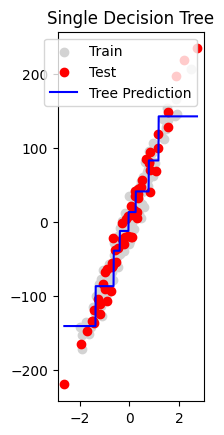

In [31]:

# Single Tree
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color='lightgray', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, y_tree, color='blue', label='Tree Prediction')
plt.title('Single Decision Tree')
plt.legend()


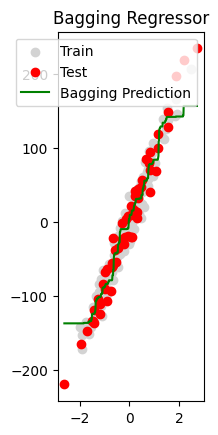

In [32]:
# Bagging
plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, color='lightgray', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, y_bagging, color='green', label='Bagging Prediction')
plt.title('Bagging Regressor')
plt.legend()

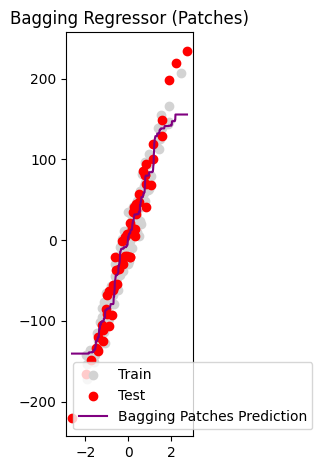

In [33]:

# Bagging + Patches
plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, color='lightgray', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, y_bagging_patches, color='purple', label='Bagging Patches Prediction')
plt.title('Bagging Regressor (Patches)')
plt.legend()

plt.tight_layout()
plt.show()
